<a href="https://colab.research.google.com/github/themasudur/machine-learning-algorithms/blob/main/ML_Lecture_7_(Logistic_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#নানা রকমের রিগ্রেশান
আমরা লিনিয়ার রিগ্রেশান দেখেছি। এ ছাড়াও আরো নানান রকমের রিগ্রেশান আছে। সাইকিট লার্ন লাইব্রেরিতে কী কী ধরণের রিগ্রেশান আছে সেসবের তালিকা দেখে নিই-  

In [ ]:
import sklearn
dir(sklearn.linear_model)

['ARDRegression',
 'BayesianRidge',
 'ElasticNet',
 'ElasticNetCV',
 'Hinge',
 'Huber',
 'HuberRegressor',
 'Lars',
 'LarsCV',
 'Lasso',
 'LassoCV',
 'LassoLars',
 'LassoLarsCV',
 'LassoLarsIC',
 'LinearRegression',
 'Log',
 'LogisticRegression',
 'LogisticRegressionCV',
 'ModifiedHuber',
 'MultiTaskElasticNet',
 'MultiTaskElasticNetCV',
 'MultiTaskLasso',
 'MultiTaskLassoCV',
 'OrthogonalMatchingPursuit',
 'OrthogonalMatchingPursuitCV',
 'PassiveAggressiveClassifier',
 'PassiveAggressiveRegressor',
 'Perceptron',
 'RANSACRegressor',
 'Ridge',
 'RidgeCV',
 'RidgeClassifier',
 'RidgeClassifierCV',
 'SGDClassifier',
 'SGDRegressor',
 'SquaredLoss',
 'TheilSenRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_bayes',
 '_cd_fast',
 '_coordinate_descent',
 '_huber',
 '_least_angle',
 '_logistic',
 '_omp',
 '_passive_aggressive',
 '_perceptron',
 '_ransac',
 '_ridge',
 '_sag',
 '_

এখানে ভেঙ্গে ভেঙ্গে লিনিয়ার রিগ্রেশান দেখানো হয়েছে- 

লিনিয়ার রিগ্রেশান এর অন্য নাম-  
* Ordinary least squares (OLS) বা Linear least squares

Traing data:  [4747 3738 4208] [1635 1297 1522]

Slope = [0.33193745]
Intercept = 80.23929815063934

Prediction:  [1405 1400] [1366.82887044 1548.73059532]




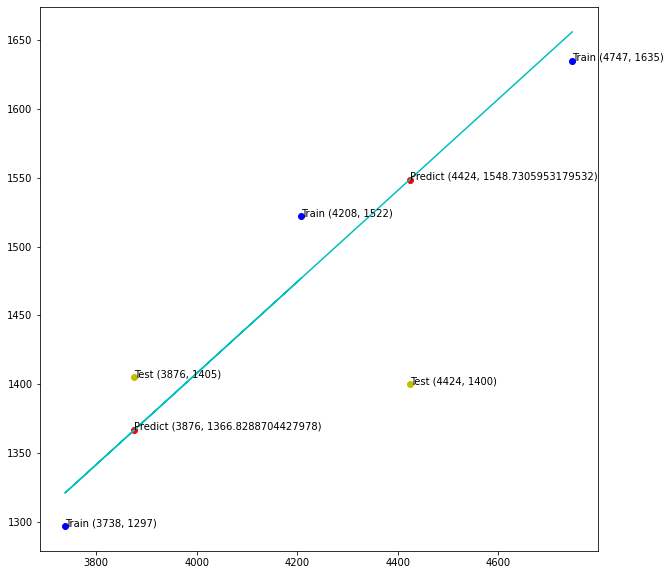

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Xdata = np.array([4747, 3738])
#ydata = np.array([1635, 1297])
Xdata = np.array([4747, 3738, 4208])
ydata = np.array([1635, 1297, 1522])

print('Traing data: ', Xdata, ydata)

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression().fit(Xdata.reshape(-1, 1), ydata)
print('\nSlope = ' + str(lin_reg.coef_) + '\nIntercept = ' + str(lin_reg.intercept_))

testX = np.array([3876, 4424])
testy = np.array([1405, 1400])
predic = lin_reg.predict(testX.reshape(-1, 1))
print('\nPrediction: ', testy, predic)
print('\n')
plt.figure(figsize=(10,10))

plt.scatter(Xdata, ydata, c='b') # Training data
for xi, yi in zip(Xdata, ydata):
  plt.text(xi, yi, 'Train ({}, {})'.format(xi, yi))
plt.plot(Xdata, lin_reg.predict(Xdata.reshape(-1, 1)), c='c')

plt.scatter(testX, testy, c='y') # Test data
for xi, yi in zip(testX, testy):
  plt.text(xi, yi, 'Test ({}, {})'.format(xi, yi))

plt.scatter(testX, predic, c='r') # Prediction
for xi, yi in zip(testX, predic):
  plt.text(xi, yi, 'Predict ({}, {})'.format(xi, yi))

plt.show()

গাণিতিক সমীকরণ হিসেবে দেখি- 

In [ ]:
# Interestingly, 
Slope = 0.33193745
Intercept = 80.23929815063934

y = Slope*3876 + Intercept
y

1366.8288543506394

1. লিনিয়ার রিগ্রেশান
3. রিজ রিগ্রেশান
3. পলিনোমিয়াল রিগ্রেশান
4. সাপোর্ট ভেক্টর রিগ্রেশান (এস ভি আর)
5. লজিস্টিক রিগ্রেশান



#রিজ রিগ্রেশান

Loss function = OLS + alpha * summation (squared coefficient values)

কখন লাগে? 
* যখন ফিচার সংখ্যা, অবজারবেশান সংখ্যার চেয়ে বেশি

* গুরুত্বপূর্ণ ফিচারগুলো আলাদা করতে হবে


In [ ]:
from pandas import read_csv
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Boston Housing Data set:
link = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"

df = read_csv(link, header=0) # O no. row includes header
print(df)
print(df.describe())

target = ['medv']
features = list(set(list(df.columns))-set(target))

X = df[features].values
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
print(X_train.shape); print(X_test.shape)

ridge = Ridge(alpha=0.01)
ridge.fit(X_train, y_train)

print('Coefficients: ', ridge.coef_)
print('y-intercepts: ', ridge.intercept_)

pred_train = ridge.predict(X_train)
print('Training r^2: ', r2_score(y_train, pred_train))
print('Training MSE: ', mean_squared_error(y_train, pred_train))

pred_test = ridge.predict(X_test)
print('Test r^2: ', r2_score(y_test, pred_test))
print('Test MSE: ', mean_squared_error(y_test, pred_test))

        crim    zn  indus  chas    nox  ...  tax  ptratio       b  lstat  medv
0    0.00632  18.0   2.31     0  0.538  ...  296     15.3  396.90   4.98  24.0
1    0.02731   0.0   7.07     0  0.469  ...  242     17.8  396.90   9.14  21.6
2    0.02729   0.0   7.07     0  0.469  ...  242     17.8  392.83   4.03  34.7
3    0.03237   0.0   2.18     0  0.458  ...  222     18.7  394.63   2.94  33.4
4    0.06905   0.0   2.18     0  0.458  ...  222     18.7  396.90   5.33  36.2
..       ...   ...    ...   ...    ...  ...  ...      ...     ...    ...   ...
501  0.06263   0.0  11.93     0  0.573  ...  273     21.0  391.99   9.67  22.4
502  0.04527   0.0  11.93     0  0.573  ...  273     21.0  396.90   9.08  20.6
503  0.06076   0.0  11.93     0  0.573  ...  273     21.0  396.90   5.64  23.9
504  0.10959   0.0  11.93     0  0.573  ...  273     21.0  393.45   6.48  22.0
505  0.04741   0.0  11.93     0  0.573  ...  273     21.0  396.90   7.88  11.9

[506 rows x 14 columns]
             crim          

#পলিনোমিয়াল রিগ্রেশান

* নন লিনিয়ার রিগ্রেশান
* এই রিগ্রেশান অনেকটাই এঁকে বেঁকে চলে। 
* আউটলায়ার নিয়ে বিপদে পড়তে হয়।

#সাপোর্ট ভেক্টর রিগ্রেশান (এস ভি আর)

Support Vector regression is a type of Support vector machine that supports linear and non-linear regression. 

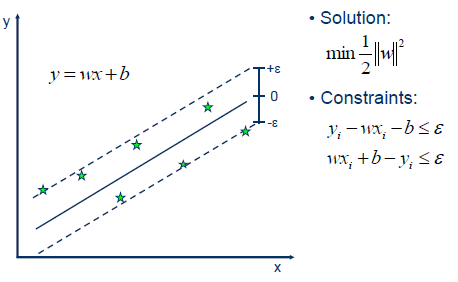

SVM is more effective in high dimensional spaces.
SVM is effective in cases where the number of dimensions is greater than the number of samples.


SVM algorithm is not suitable for large data sets.


[4747 3738 4208] [1635 1297 1522]
Scaled training:  [[ 1.25168755]
 [-1.19589527]
 [-0.05579227]] [[ 1.07006117]
 [-1.33579698]
 [ 0.26573581]]
Test:  [3876 4424] [1405 1200]
Scaled predicted:  [0.11496009 0.11496009]
Predicted:  [1500.81745687 1500.81745687]




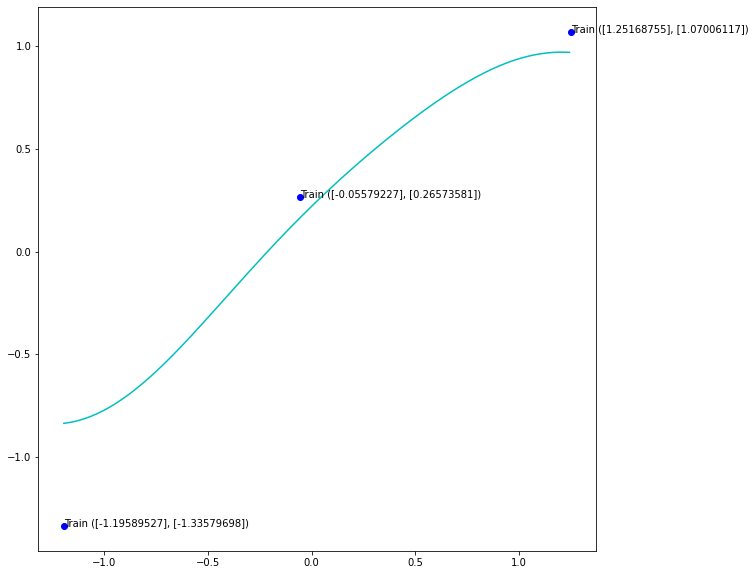

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Xdata = np.array([4747, 3738, 4208])
ydata = np.array([1635, 1297, 1522])

print(Xdata, ydata)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
Xdata = sc_X.fit_transform(Xdata.reshape(-1,1))
ydata = sc_y.fit_transform(ydata.reshape(-1,1))

print('Scaled training: ', Xdata, ydata)

from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(Xdata, ydata.ravel())

testX = np.array([3876, 4424])
testy = np.array([1405, 1200])

print('Test: ', testX, testy)

predicScaled = regressor.predict(testX.reshape(-1,1))
print('Scaled predicted: ', predicScaled)
predic = sc_y.inverse_transform(predicScaled) 
print('Predicted: ', predic)

print('\n')
plt.figure(figsize=(10,10))

X_grid = np.arange(min(Xdata), max(Xdata), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(Xdata, ydata, c='b') # Training data
for xi, yi in zip(Xdata, ydata):
  plt.text(xi, yi, 'Train ({}, {})'.format(xi, yi))
plt.plot(X_grid, regressor.predict(X_grid), color = 'c')
plt.show()

**Task:** Explore: `sklearn.svm.LinearSVC`

কখন কোন রিগ্রেশান- 

বিবেচনায় বিষয়: 
* লিনিয়ারিটি => এস ভি আর (works well on both)
* ফিচার সংখ্যা, স্যাম্পল সংখ্যা => রিজ/এস ভি আর
* আউটলায়ার আছে??? => কখনোই লিনিয়ার নয়
* ইম্পোর্টেন্ট ভেরিয়েবল কোনগুলো? => রিজ
* ডেটা নিউমেরিক নয়- লজিস্টিক রিগ্রেশান

https://statisticsbyjim.com/regression/choosing-regression-analysis/


আরো জানতে-

https://scikit-learn.org/stable/modules/linear_model.html

---
**Task:**
Make your own code to compare various types of regression analysis. 

---

#লজিস্টিক রিগ্রেশান

লিনিয়ার রিগ্রেশানের জন্য, 

$z = β_0 + β_1x$

লজিস্টিক রিগ্রেশানের জন্য, 

$h(x)=sigmoid(z)$

$h(x)=\frac{1}{1 + e^{-(β_0 + β_1x)}}$

$f(x)=\frac{1}{1+e^{-x}}$

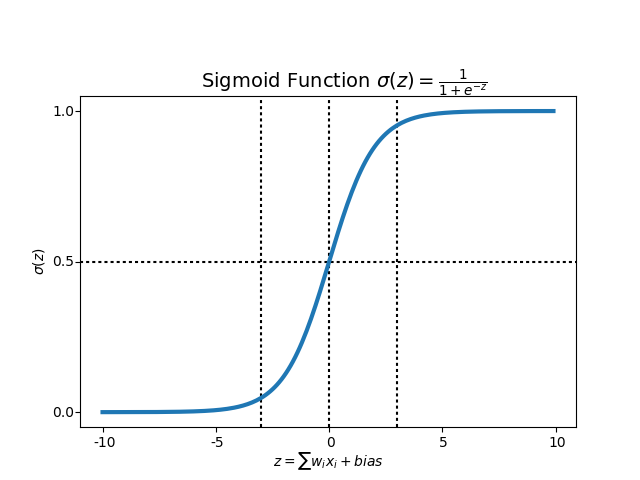


[1 2 0 2 0 1 1 1 0 1 1 1 1 0 0 2 2 0 0 0 2 2 1 0 1 0 1 1 2 2 2 2 2 1 1 0 2
 2 2 2 0 0 1 1 2]
           0         1         2  Class value
0   0.003067  0.594565  0.402368            1
1   0.008550  0.465656  0.525794            2
2   0.880626  0.063390  0.055983            0
3   0.061445  0.458077  0.480478            2
4   0.867435  0.096973  0.035592            0
5   0.050624  0.860432  0.088944            1
6   0.006095  0.545381  0.448524            1
7   0.058816  0.610002  0.331183            1
8   0.872661  0.087391  0.039949            0
9   0.108974  0.582468  0.308558            1
10  0.253930  0.475263  0.270806            1
11  0.058816  0.610002  0.331183            1
12  0.036167  0.768042  0.195790            1
13  0.748567  0.202360  0.049072            0
14  0.965483  0.020606  0.013911            0
15  0.005561  0.287026  0.707413            2
16  0.259238  0.312418  0.428344            2
17  0.928671  0.063027  0.008303            0
18  0.951793  0.029898  0.018309 

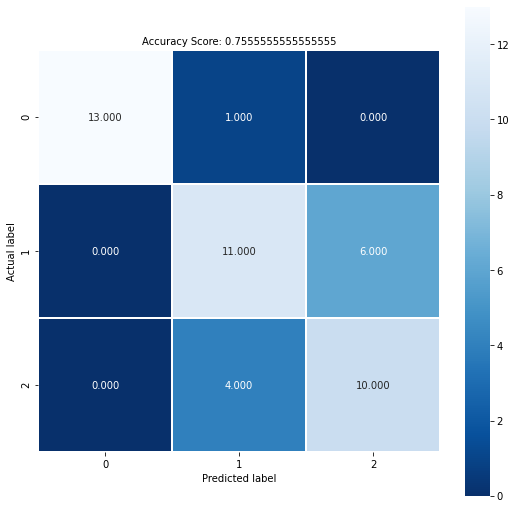

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target
#print(X,y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
#print(X_train.shape); print(X_test.shape)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train) # learn

# Probabilities of the predicted output 
prob_output = log_reg.predict_proba(X_test)
print(prob_output)

y_pred = log_reg.predict(X_test)
print(y_pred)

rows = pd.DataFrame(log_reg.predict_proba(X_test), columns=log_reg.classes_)
pred = pd.DataFrame(y_pred,columns=['predicted Class'])
print(pd.merge(rows,pred, left_index=True, right_index=True))

#print('Test accuracy of logistic regression: {:.2f}'.format(log_reg.score(X_test, y_test)))

# IMPORTANT fo rall classification algorithms

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
#print(cm)

# Heat map
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Accuracy Score: {0}'.format(log_reg.score(X_test, y_test))
plt.title(title, size = 10);

from sklearn.metrics import classification_report
#print(classification_report(y_test, y_pred))

In [ ]:
# Accuracy
print(round(34/45,2))

# Precision


0.76


In [ ]:
import sklearn
dir(sklearn.datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circles',
 'make_class

#এক্সারসাইজ

* Data source: `from sklearn.datasets import load_digits`
`digits = load_digits()` [Multiclass]
* Banking data set: https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv

* Explore your own data set, self-made or scrapped
* `candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690], 'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5], 'admitted': [1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1] }`
* Reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
